In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pk
import matplotlib.pyplot as plt
%matplotlib inline

### First we build the patient network.

Here each node is a patient and they are connected by weighted edges - the weight is the number of shared symptoms.
Building this take a long time but you only need to do it once!

##### TODO: install [NetworkKit](https://networkit.github.io/dev-docs/python_api/community.html) for full range of community metrics.

In [3]:
from utilities import build_patient_graph

In [4]:
# G = build_patient_graph()

#### Once it has been built, it is saved locally in ```graphs/``` and can be loaded, which is still a bit slow...

In [156]:
H = nx.read_weighted_edgelist('graphs/full_patient_graph_shared_symptom_count.edgelist', nodetype=int)
# H = nx.read_weighted_edgelist('graphs/full_patient_graph_shared_symptom_relative.edgelist', nodetype=int)
# H = nx.read_weighted_edgelist('graphs/full_patient_graph_shared_symptom_hamming_complement.edgelist', nodetype=int)

In [157]:
print("The graph has %d edges." % len(H.edges.data()))

The graph has 18177137 edges.


In [158]:
all_weights = [
    edge[2]['weight']
    for edge in H.edges.data()
]

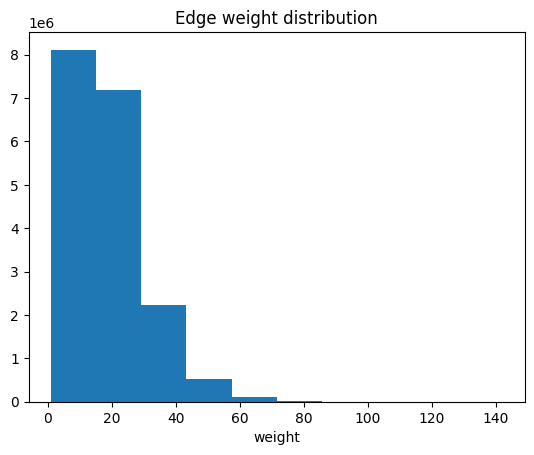

In [159]:
plt.title('Edge weight distribution')
plt.hist(all_weights)
plt.xlabel('weight');

In [160]:
print("The fewest symtpoms shared between two patients is %.2f." % np.min(all_weights))
print("The mean number of symtpoms shared between two patients is %.2f." % np.mean(all_weights))
print("The median number of symtpoms shared between two patients is %.2f." % np.median(all_weights))
print("The most symtpoms shared between two patients is %.2f." % np.max(all_weights))

The fewest symtpoms shared between two patients is 1.00.
The mean number of symtpoms shared between two patients is 18.99.
The median number of symtpoms shared between two patients is 17.00.
The most symtpoms shared between two patients is 142.00.


#### We can then find a partition of G using Louvain community detection.

Note: this takes some time as it is a large network with high connectivity. It feels like a sufficiently hard problem that deep community detection could be worth a go.

In [161]:
communities = nx.community.louvain_communities(H, resolution=1, seed=42)

In [175]:
from copy import copy

In [176]:
louvain_communities = copy(communities)

In [195]:
communities = nx.community.greedy_modularity_communities(H, cutoff=2, weight='weight', resolution=1.01)

In [196]:
len(communities)

9

In [197]:
# with open('./graphs/full_patient_relative_graph_louvain_communities_gamma_1.1.pickle', 'wb') as outfile:
#     pk.dump(communities, outfile)

# with open('./graphs/full_patient_graph_louvain_communities_gamma_1.pickle', 'rb') as infile:
#     communities_g = pk.load(infile)

# with open('./graphs/full_patient_relative_graph_louvain_communities_gamma_1.pickle', 'rb') as infile:
#     communities_h = pk.load(infile)

##### Louvain finds three large communities:

In [198]:
for ci, c in enumerate(communities):
    print("Size of community %d: %d" % (ci, len(c)))

Size of community 0: 3107
Size of community 1: 2121
Size of community 2: 517
Size of community 3: 198
Size of community 4: 66
Size of community 5: 16
Size of community 6: 3
Size of community 7: 2
Size of community 8: 1


In [182]:
for ci, c in enumerate(communities):
    print("Size of community %d: %d" % (ci, len(c)))

Size of community 0: 3442
Size of community 1: 2589


##### We can use the modularity helper function to compute the weighted modularity for these communities on G:

In [183]:
from utilities import modularity

In [199]:
modularity(partition=communities, graph=H)

0.018310171410048873

In [184]:
modularity(partition=communities, graph=H)

0.018699186539528012

This suggests it is not a great partition? Although any given network will have an upper bound on the maximunm attainable modularity, and perhaps it is relatively low for this network given the high connectivity?

##### It will be interesting to try out different partitions/clusters...

In [167]:
# nx.average_clustering(G, weight='weight')

In [168]:
from utilities import load_symptom_data

In [169]:
df = load_symptom_data('../data/cleaned_data_SYMPTOMS_9_13_23.csv')

In [170]:
community_data = {
    ci: df.loc[list(c)].sum() / len(c)
    for ci, c in enumerate(communities)
}   

In [171]:
community_data[0].sort_values(ascending=False).head(20)

Symptom_Fatigue                                         0.970127
Symptom_Memory_short                                    0.936893
Symptom_PEM                                             0.836072
Symptom_Shortness_of_breath                             0.744212
Symptom_Tightness_of_chest                              0.696042
Symptom_Dry_cough                                       0.636669
Symptom_Heart_palpitations                              0.607916
Symptom_Insomnia                                        0.603435
Symptom_Muscle_aches                                    0.592606
Symptom_Cognitive_Functioning_attentionconcentration    0.590739
Symptom_Gasping_air_normal_oxygen                       0.544063
Symptom_Dizziness_vertigo                               0.532487
Symptom_Tachycardia                                     0.527633
Symptom_Sore_throat                                     0.512323
Symptom_Diarrhea                                        0.507095
Symptom_Elevated_temp    

In [172]:
community_data[1].sort_values(ascending=False).head(20)

Symptom_Fatigue                                         0.982828
Symptom_PEM                                             0.934343
Symptom_Memory_short                                    0.915657
Symptom_Dizziness_vertigo                               0.868687
Symptom_Cognitive_Functioning_attentionconcentration    0.852525
Symptom_Muscle_aches                                    0.831818
Symptom_Insomnia                                        0.831313
Symptom_Heart_palpitations                              0.799495
Symptom_Cognitive_Functioning_thinking                  0.796970
Symptom_Sensations_skin_burning_no_rash                 0.794444
Symptom_Joint_pain                                      0.769697
Symptom_Shortness_of_breath                             0.762121
Symptom_Tachycardia                                     0.756061
Symptom_Sensations_tingling_prickling                   0.754040
Symptom_Chills_flushing_sweats                          0.753030
Symptom_Tightness_of_ches

In [173]:
community_data[2].sort_values(ascending=False).head(20)

Symptom_Fatigue                                         0.992717
Symptom_Cognitive_Functioning_attentionconcentration    0.925710
Symptom_Memory_short                                    0.911872
Symptom_Cognitive_Functioning_thinking                  0.908958
Symptom_PEM                                             0.903132
Symptom_Cognitive_Functioning_executive                 0.851420
Symptom_Speech_difficulty_finding_words                 0.823744
Symptom_Cognitive_Functioning_problemsolving            0.807720
Symptom_Shortness_of_breath                             0.686089
Symptom_Insomnia                                        0.669337
Symptom_Dizziness_vertigo                               0.662782
Symptom_Memory_long                                     0.648216
Symptom_Muscle_aches                                    0.619082
Symptom_Cognitive_Functioning_slowedthoughts            0.598689
Symptom_Dry_cough                                       0.594319
Symptom_Speech_difficulty

##### For comparison with the Louvain communities modularity value, we test some random community allocations:

In [23]:
number_of_communities = 3

In [24]:
import random

In [25]:
random_community_ids = [random.randint(0, number_of_communities-1) for i in range(6031)]

random_communities = [
    {ni for ni,n in enumerate(random_community_ids) if n == i}
    for i in range(number_of_communities)
]

In [ ]:
gamma = 1
nx.community.modularity(H, random_communities, resolution=gamma)

##### Lets try plotting this network:

In [29]:
pos = nx.spring_layout(H)

In [32]:
def get_community(i, parition):
    for pi, part in enumerate(parition):
        if i in part:
            return pi

    return -1

In [34]:
y = [
    get_community(r[0], communities)
    for r in  df.iterrows()
]

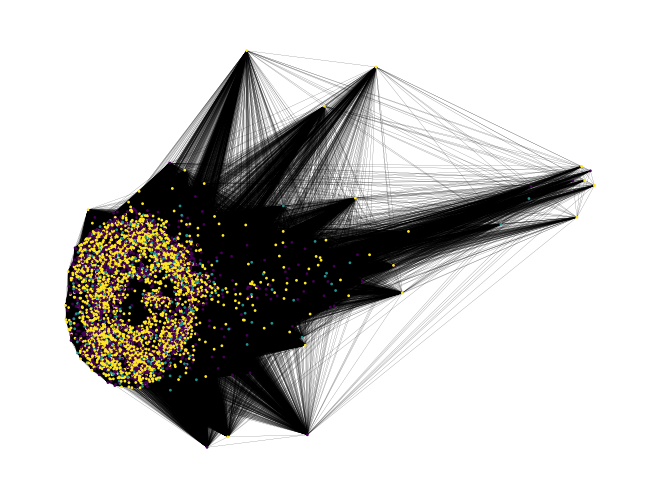

In [36]:
nx.draw(H, pos=pos, width=0.1, node_size=1, node_color=y)